In [1]:
# To access Google Drive:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
PATH = "/content/gdrive/MyDrive/Data"
TEMP_PATH = "/content/gdrive/MyDrive/Data/temperature data"
C_GHG_PATH = "/content/gdrive/MyDrive/Data/Combined GHG data"
# S_GHG_PATH_1990 = "/content/gdrive/MyDrive/Data/all GHG data 1990-2014"
# S_GHG_PATH_2015 = "/content/gdrive/MyDrive/Data/all GHG data 2015-2021"

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

## **Temperature Data**
temperature anomaly is recorded through the temperature comparison between current and the period (Jan 1951 to Dec 1980)

temperature anomaly is in Celsius.
 Uncertainties represent the 95% confidence interval for statistical and spatial undersampling effects as well as ocean biases

In [4]:
temp_data = pd.read_csv(TEMP_PATH+"/temperature data.txt", sep="\s+", skiprows=84)
temp_data.head(2)

,%,"Year,","Month,","Anomaly,","Unc.,","Anomaly,.1","Unc.,.1","Anomaly,.2","Unc.,.2","Anomaly,.3","Unc.,.3","Anomaly,.4",Unc.
0,1850,1,-0.784,0.374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.220,0.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
temp_data.rename(columns={temp_data.columns[0]:"year",temp_data.columns[1]:"month",
                          temp_data.columns[2]:"monthly_anomaly",temp_data.columns[3]:"monthly_inc",
                          temp_data.columns[4]:"annual_anomaly",temp_data.columns[5]:"annual_inc",
                          temp_data.columns[6]:"five_year_anomaly",temp_data.columns[7]:"five_year_inc",
                          temp_data.columns[8]:"ten_year_anomaly",temp_data.columns[9]:"ten_year_inc",
                          temp_data.columns[10]:"twenty_year_anomaly",temp_data.columns[11]:"twenty_year_inc",
                          }, inplace= True)

In [6]:
temp_data.head(2)

,year,month,monthly_anomaly,monthly_inc,annual_anomaly,annual_inc,five_year_anomaly,five_year_inc,ten_year_anomaly,ten_year_inc,twenty_year_anomaly,twenty_year_inc,Unc.
0,1850,1,-0.784,0.374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.220,0.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4190 entries, 0 to 4189
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 4190 non-null   object
 1   month                4189 non-null   object
 2   monthly_anomaly      4189 non-null   object
 3   monthly_inc          4189 non-null   object
 4   annual_anomaly       4167 non-null   object
 5   annual_inc           4167 non-null   object
 6   five_year_anomaly    4070 non-null   object
 7   five_year_inc        4070 non-null   object
 8   ten_year_anomaly     3950 non-null   object
 9   ten_year_inc         3950 non-null   object
 10  twenty_year_anomaly  3710 non-null   object
 11  twenty_year_inc      3710 non-null   object
 12  Unc.                 2 non-null      object
dtypes: object(13)
memory usage: 425.7+ KB


In [8]:
temp_data.shape

(4190, 13)

In [9]:
temp_data.dtypes

,0
year,object
month,object
monthly_anomaly,object
monthly_inc,object
annual_anomaly,object
annual_inc,object
five_year_anomaly,object
five_year_inc,object
ten_year_anomaly,object
ten_year_inc,object


In [10]:
temp_data[temp_data['year']=="%"]

,year,month,monthly_anomaly,monthly_inc,annual_anomaly,annual_inc,five_year_anomaly,five_year_inc,ten_year_anomaly,ten_year_inc,twenty_year_anomaly,twenty_year_inc,Unc.
2093,%,Global,Average,Temperature,Anomaly,with,Sea,Ice,Temperature,Inferred,from,Water,Temperatures
2094,%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2095,%,Monthly,Annual,Five-year,Ten-year,Twenty-year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,%,"Year,","Month,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,","Unc.,","Anomaly,",Unc.


In [11]:
temp_data = temp_data[temp_data['year']!="%"]

In [12]:
for col in temp_data.columns:
  if col == "year":
    temp_data[col] = temp_data[col].astype('int32')
  elif col == "month":
    temp_data[col] = temp_data[col].astype('int32')
  else:
    temp_data[col] = temp_data[col].astype('float32')

temp_data.dtypes

,0
year,int32
month,int32
monthly_anomaly,float32
monthly_inc,float32
annual_anomaly,float32
annual_inc,float32
five_year_anomaly,float32
five_year_inc,float32
ten_year_anomaly,float32
ten_year_inc,float32


In [12]:
temp_data.head()

,year,month,monthly_anomaly,monthly_inc,annual_anomaly,annual_inc,five_year_anomaly,five_year_inc,ten_year_anomaly,ten_year_inc,twenty_year_anomaly,twenty_year_inc,Unc.
0,1850,1,-0.784,0.374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.220,0.468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.382,0.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.618,0.443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.651,0.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
temp_data.describe()

,year,month,monthly_anomaly,monthly_inc,annual_anomaly,annual_inc,five_year_anomaly,five_year_inc,ten_year_anomaly,ten_year_inc,twenty_year_anomaly,twenty_year_inc,Unc.
count,4186.00000,4186.000000,4186.000000,4186.000000,4164.000000,4164.000000,4068.000000,4068.000000,3948.000000,3948.000000,3708.000000,3708.000000,0.0
mean,1936.70903,6.491639,-0.006402,0.115497,-0.008613,0.076809,-0.016238,0.062708,-0.025495,0.058003,-0.040522,0.053028,NaN
std,50.35615,3.453262,0.410587,0.075865,0.388359,0.045418,0.364165,0.036104,0.344248,0.030978,0.310903,0.026467,NaN
min,1850.00000,1.000000,-1.057000,0.026000,-0.617000,0.024000,-0.463000,0.019000,-0.433000,0.018000,-0.368000,0.014000,NaN
25%,1893.00000,3.000000,-0.298000,0.047000,-0.300250,0.032000,-0.305000,0.024000,-0.303000,0.022000,-0.309000,0.020000,NaN
50%,1937.00000,6.000000,-0.096000,0.107000,-0.112000,0.078000,-0.098500,0.068000,-0.074000,0.065000,-0.063000,0.062000,NaN
75%,1980.00000,9.000000,0.204000,0.151000,0.180000,0.090000,0.197250,0.076000,0.132000,0.072000,0.083250,0.069000,NaN
max,2024.00000,12.000000,1.559000,0.533000,1.353000,0.257000,1.058000,0.198000,1.005000,0.130000,0.848000,0.109000,NaN


In [14]:
temp_data = temp_data[~temp_data['annual_anomaly'].isnull()]

In [15]:
annual_temp_df = temp_data.groupby('year').mean() [['annual_anomaly','annual_inc']].reset_index()

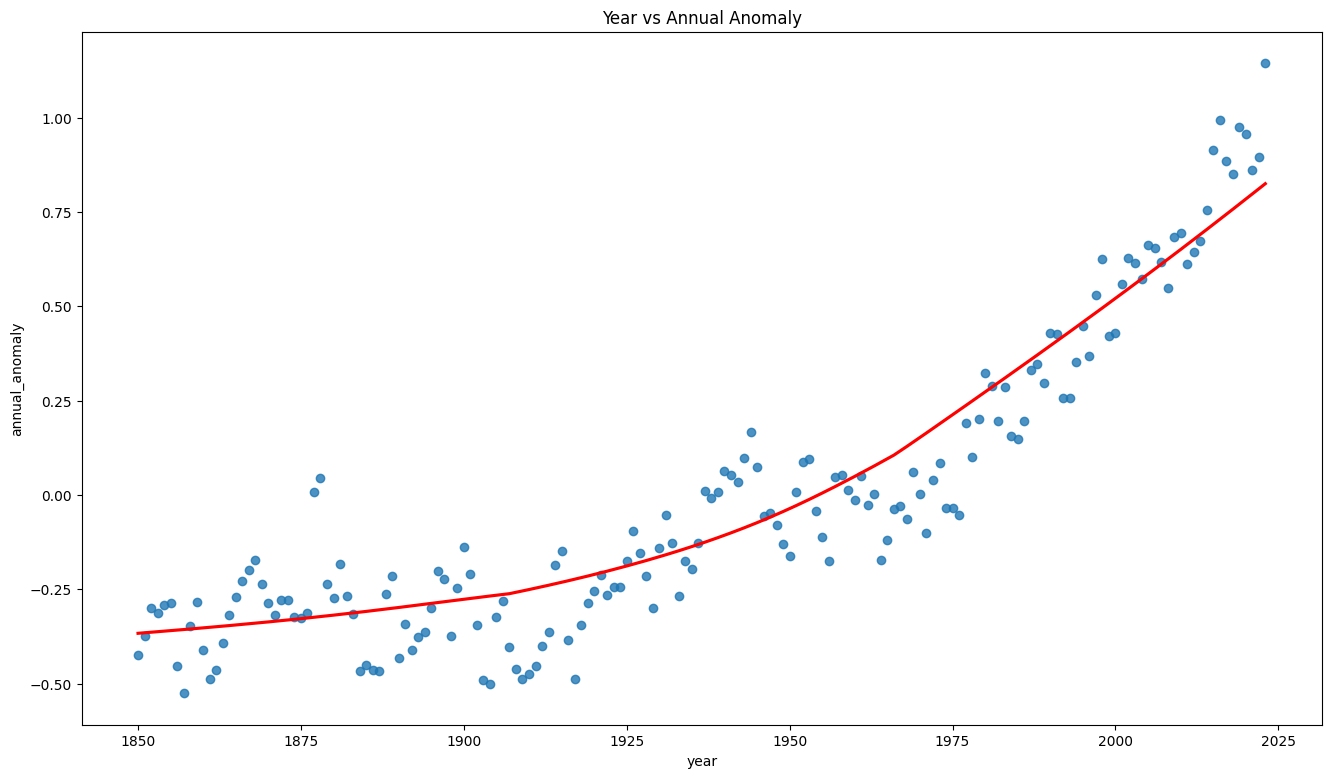

In [16]:
plt.figure(figsize=(16,9))
sns.regplot(x=annual_temp_df.year, y=annual_temp_df.annual_anomaly, lowess=True, line_kws={'color': 'red'})
plt.title("Year vs Annual Anomaly")
plt.show()


Above plot shows the variation of anomalies over years. Here it can be seen that the temperature anomaly have an exponential increase after 1975. which is also considered as the start of the industrialization era.

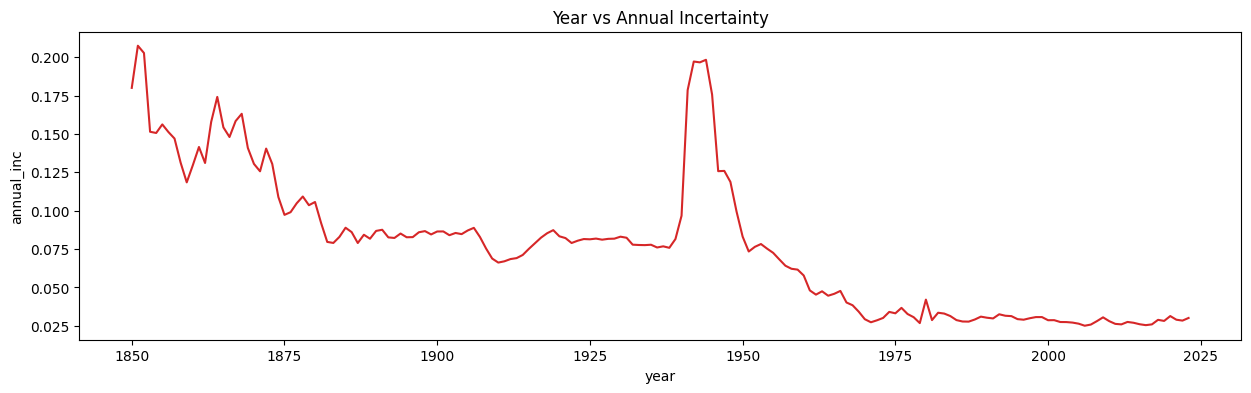

In [17]:
def plot_df(df, x, y, title="", xlabel='year', ylabel='annual_inc', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()


plot_df(annual_temp_df, x=annual_temp_df['year'], y=annual_temp_df['annual_inc'], title='Year vs Annual Incertainty')

In [18]:
tem_df = temp_data.groupby('year').max() [['annual_anomaly','annual_inc']].reset_index()
tem_df.set_index('year', inplace=True)

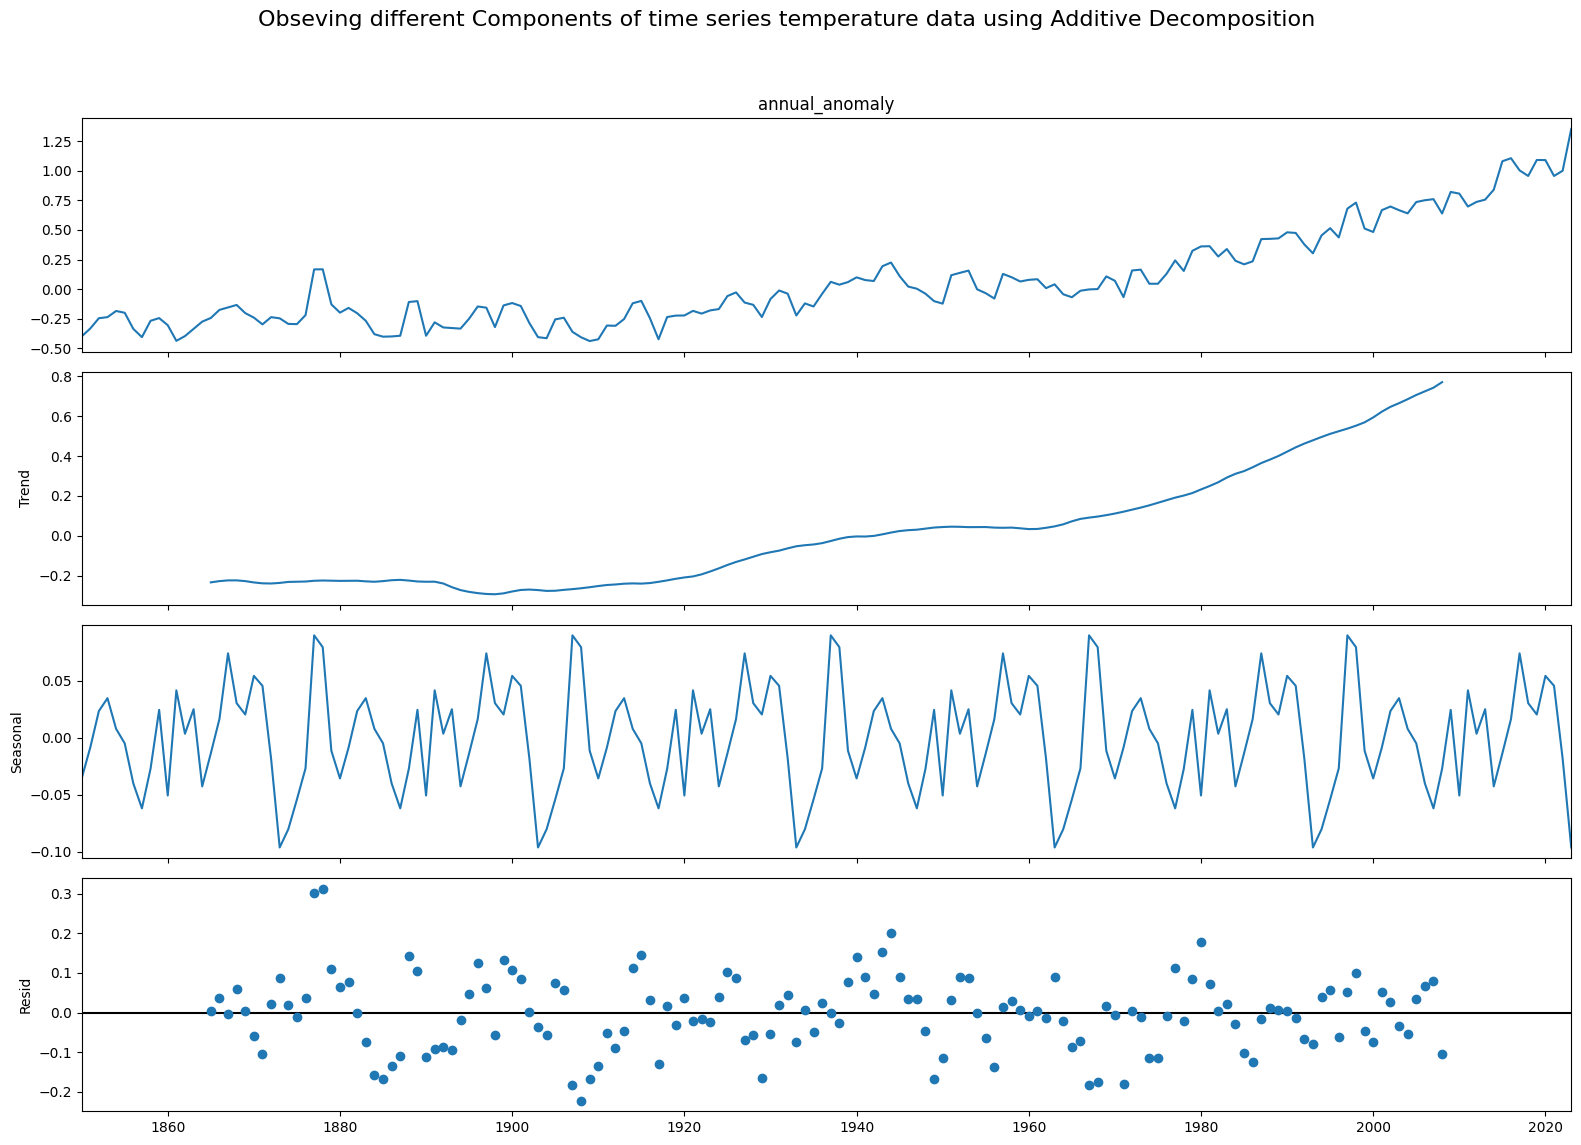

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

additive_decomposition = seasonal_decompose(tem_df['annual_anomaly'], model='additive', period=30)
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Obseving different Components of time series temperature data using Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

## **GHG Data**

In [20]:
GHG_sector_data = pd.read_excel(C_GHG_PATH+"/EDGARv8.0_FT2022_GHG_booklet_2023 (2).xlsx", sheet_name='GHG_by_sector_and_country')
GHG_sector_data.head(2)

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CO2,Agriculture,AFG,Afghanistan,0.029229,0.029229,0.029229,0.029229,0.039967,0.045310,...,0.055157,0.084490,0.116967,0.162800,0.310881,0.160914,0.150438,0.064795,0.054361,0.046161
1,CO2,Agriculture,ALB,Albania,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,...,0.032738,0.056624,0.058719,0.049605,0.056676,0.048976,0.069405,0.063067,0.063936,0.064880


In [21]:
ghg_melted = pd.melt(GHG_sector_data, id_vars=['Substance', 'Sector','EDGAR Country Code','Country'],
                     var_name='Year', value_name='Unit')
ghg_melted['Year'] = ghg_melted['Year'].astype(int)
ghg_melted.head()

,Substance,Sector,EDGAR Country Code,Country,Year,Unit
0,CO2,Agriculture,AFG,Afghanistan,1970,0.029229
1,CO2,Agriculture,ALB,Albania,1970,0.113300
2,CO2,Agriculture,ARG,Argentina,1970,0.104343
3,CO2,Agriculture,ARM,Armenia,1970,0.055288
4,CO2,Agriculture,AUS,Australia,1970,0.311143


In [22]:
ghg_melted['Substance'].unique()

array(['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O',
       nan], dtype=object)

In [23]:
ghg_melted = ghg_melted[~ghg_melted['Substance'].isnull()]

In [24]:
ghg_melted.isnull().sum()

,0
Substance,0
Sector,0
EDGAR Country Code,0
Country,0
Year,0
Unit,5238


In [25]:
ghg_melted.fillna(0, inplace=True)

In [26]:
ghg_melted.isnull().sum()

,0
Substance,0
Sector,0
EDGAR Country Code,0
Country,0
Year,0
Unit,0


In [27]:
ghg_melted.groupby("Substance").count()

,Sector,EDGAR Country Code,Country,Year,Unit
Substance,,,,,
CO2,77645,77645,77645,77645,77645
GWP_100_AR5_CH4,82044,82044,82044,82044,82044
GWP_100_AR5_F-gases,8374,8374,8374,8374,8374
GWP_100_AR5_N2O,87821,87821,87821,87821,87821


In [28]:
ghg_pivot = ghg_melted.pivot_table(index=['EDGAR Country Code', 'Country', 'Year', 'Sector'],
                                columns='Substance', values='Unit').reset_index()
ghg_pivot.columns.name = None
ghg_pivot.head()


,EDGAR Country Code,Country,Year,Sector,CO2,GWP_100_AR5_CH4,GWP_100_AR5_F-gases,GWP_100_AR5_N2O
0,ABW,Aruba,1970,Buildings,5.368535e-03,0.000095,NaN,0.000023
1,ABW,Aruba,1970,Fuel Exploitation,2.009529e-08,0.000135,NaN,0.000002
2,ABW,Aruba,1970,Industrial Combustion,1.930868e-04,0.000052,NaN,0.000066
3,ABW,Aruba,1970,Power Industry,1.734371e-02,0.000007,NaN,0.000023
4,ABW,Aruba,1970,Processes,5.134156e-04,NaN,NaN,0.000147


In [29]:
ghg_pivot.isnull().sum()

,0
EDGAR Country Code,0
Country,0
Year,0
Sector,0
CO2,10653
GWP_100_AR5_CH4,6254
GWP_100_AR5_F-gases,79924
GWP_100_AR5_N2O,477


In [30]:
ghg_pivot.fillna(0, inplace=True)

In [31]:
ghg_pivot = ghg_pivot[ghg_pivot['Country']!='GLOBAL TOTAL']

### **GreenHouse Gases Analysis**

In [32]:
Sector_df = ghg_pivot.groupby(['Year','Sector'])[['CO2', 'GWP_100_AR5_CH4','GWP_100_AR5_F-gases','GWP_100_AR5_N2O']].mean().reset_index()

#### **Greenhouse Gases Emission in terms of different sector over time**

In [33]:
import plotly.express as px

for gas in ['CO2', 'GWP_100_AR5_CH4','GWP_100_AR5_F-gases','GWP_100_AR5_N2O']:
    fig = px.line(Sector_df, x='Year', y=gas, color='Sector',
                title=f'Emissions of {gas} in different Sector Over Time')
    fig.show()


#### **Greenhouse gases variation in terms of Countries over time**

In [34]:
CO2_country = ghg_pivot.groupby(['Year','Country','EDGAR Country Code'])['CO2'].mean().reset_index()

fig = px.choropleth(CO2_country,
                    locations='EDGAR Country Code',
                    color='CO2',
                    hover_name='Country',
                    animation_frame='Year',
                    color_continuous_scale='Reds',  # Choose a color scale
                    range_color=(CO2_country['CO2'].min(), 1000),  # Set color range for better visibility
                    title='CO2 Emissions Over Time'
                   )

fig.show()


In [35]:
CH4_country = ghg_pivot.groupby(['Year','Country','EDGAR Country Code'])['GWP_100_AR5_CH4'].mean().reset_index()

fig = px.choropleth(CH4_country,
                    locations='EDGAR Country Code',
                    color='GWP_100_AR5_CH4',
                    hover_name='Country',
                    animation_frame='Year',
                    color_continuous_scale='Blues',
                    range_color=(CH4_country['GWP_100_AR5_CH4'].min(), CH4_country['GWP_100_AR5_CH4'].max()),
                    title='CH4 Emissions Over Time'
                   )

fig.show()

In [36]:
F_country = ghg_pivot.groupby(['Year','Country','EDGAR Country Code'])['GWP_100_AR5_F-gases'].mean().reset_index()

fig = px.choropleth(F_country,
                    locations='EDGAR Country Code',
                    color='GWP_100_AR5_F-gases',
                    hover_name='Country',
                    animation_frame='Year',
                    color_continuous_scale='Greens',
                    range_color=(F_country['GWP_100_AR5_F-gases'].min(), F_country['GWP_100_AR5_F-gases'].max()),
                    title='F-Gases Emissions Over Time'
                   )

fig.show()

In [37]:
N2O_country = ghg_pivot.groupby(['Year','Country','EDGAR Country Code'])['GWP_100_AR5_N2O'].mean().reset_index()

fig = px.choropleth(N2O_country,
                    locations='EDGAR Country Code',
                    color='GWP_100_AR5_N2O',
                    hover_name='Country',
                    animation_frame='Year',
                    color_continuous_scale='Oranges',
                    range_color=(N2O_country['GWP_100_AR5_N2O'].min(), N2O_country['GWP_100_AR5_N2O'].max()),
                    title='N2O Emissions Over Time'
                   )

fig.show()

#### **Assoication between Greenhouse Gases**

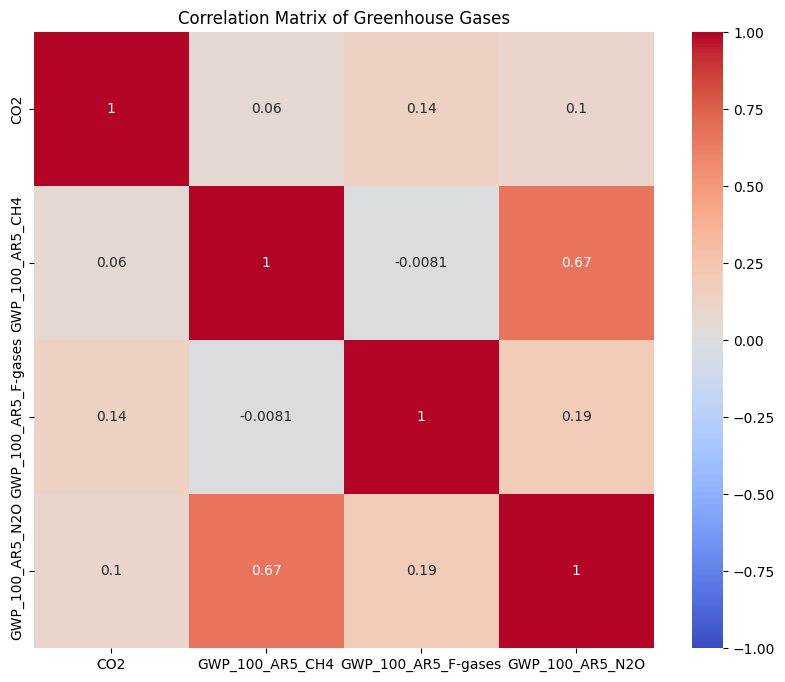

In [38]:
correlation_matrix = ghg_pivot[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Greenhouse Gases')
plt.show()


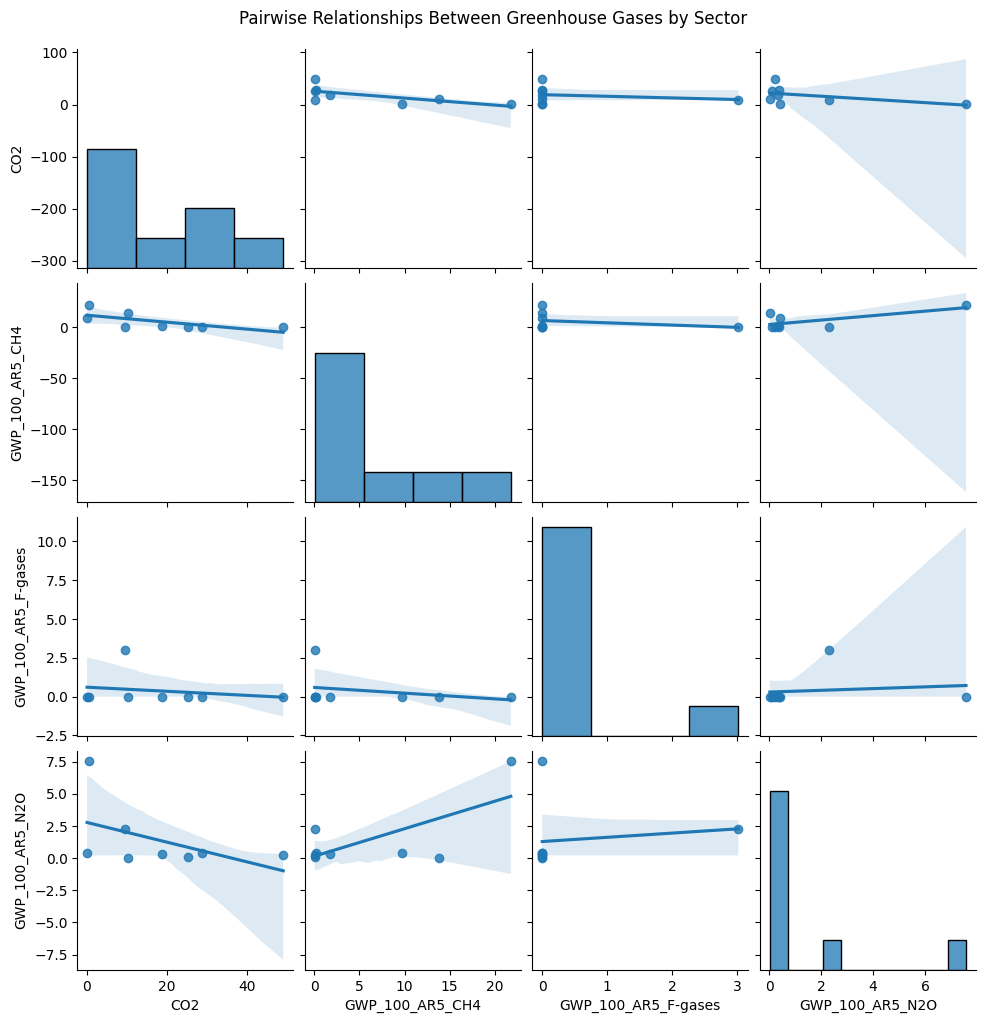

In [39]:
sector_emissions = ghg_pivot.groupby('Sector')[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']].mean()
sns.pairplot(sector_emissions, kind='reg')
plt.suptitle('Pairwise Relationships Between Greenhouse Gases by Sector', y=1.02)
plt.show()


#### **Analysis of Assoication between Greenhouse gases over Different Sectors**

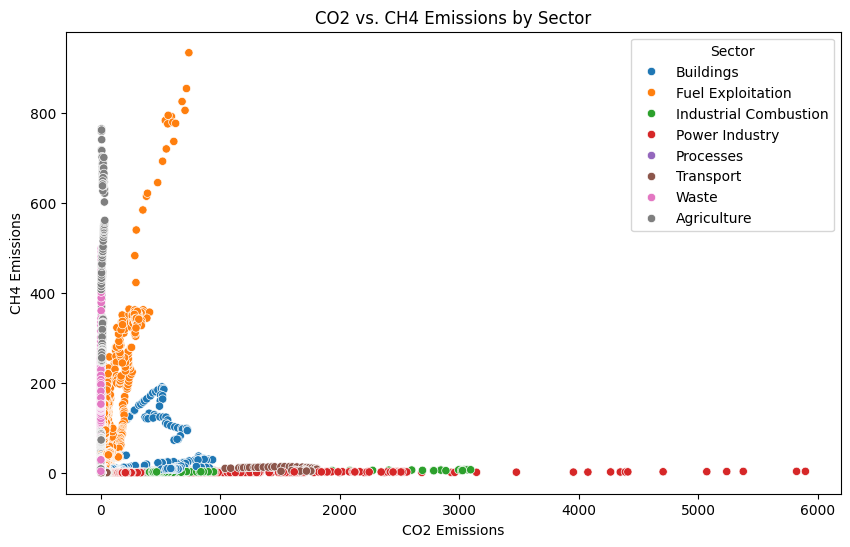

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg_pivot, x='CO2', y='GWP_100_AR5_CH4', hue='Sector')
plt.title('CO2 vs. CH4 Emissions by Sector')
plt.xlabel('CO2 Emissions')
plt.ylabel('CH4 Emissions')
plt.show()


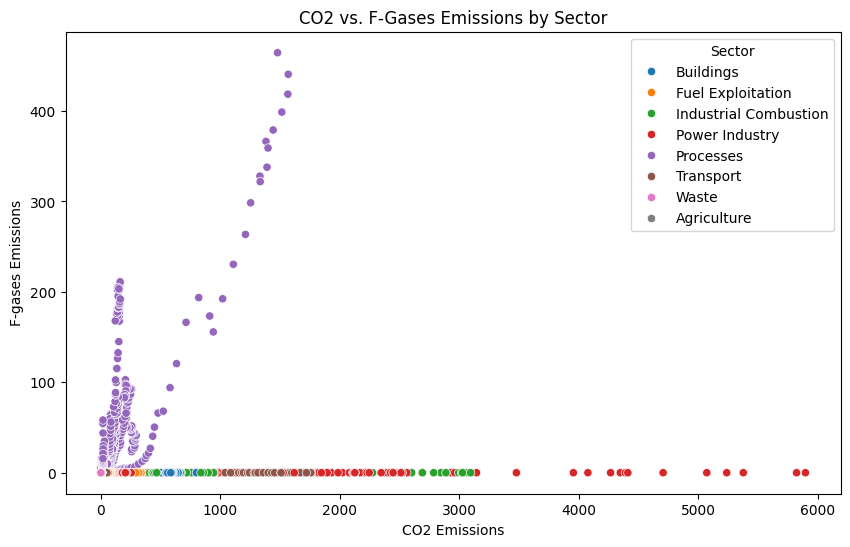

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg_pivot, x='CO2', y='GWP_100_AR5_F-gases', hue='Sector')
plt.title('CO2 vs. F-Gases Emissions by Sector')
plt.xlabel('CO2 Emissions')
plt.ylabel('F-gases Emissions')
plt.show()

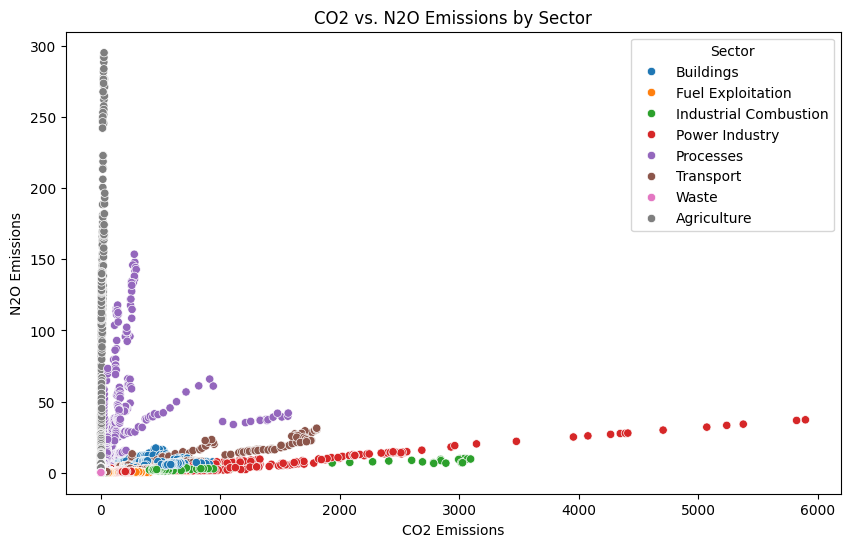

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg_pivot, x='CO2', y='GWP_100_AR5_N2O', hue='Sector')
plt.title('CO2 vs. N2O Emissions by Sector')
plt.xlabel('CO2 Emissions')
plt.ylabel('N2O Emissions')
plt.show()

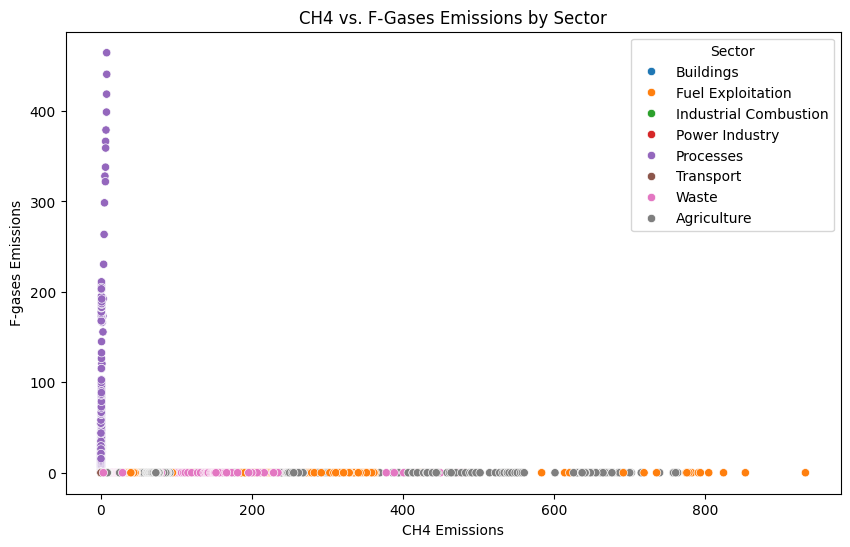

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg_pivot, x='GWP_100_AR5_CH4', y='GWP_100_AR5_F-gases', hue='Sector')
plt.title('CH4 vs. F-Gases Emissions by Sector')
plt.xlabel('CH4 Emissions')
plt.ylabel('F-gases Emissions')
plt.show()

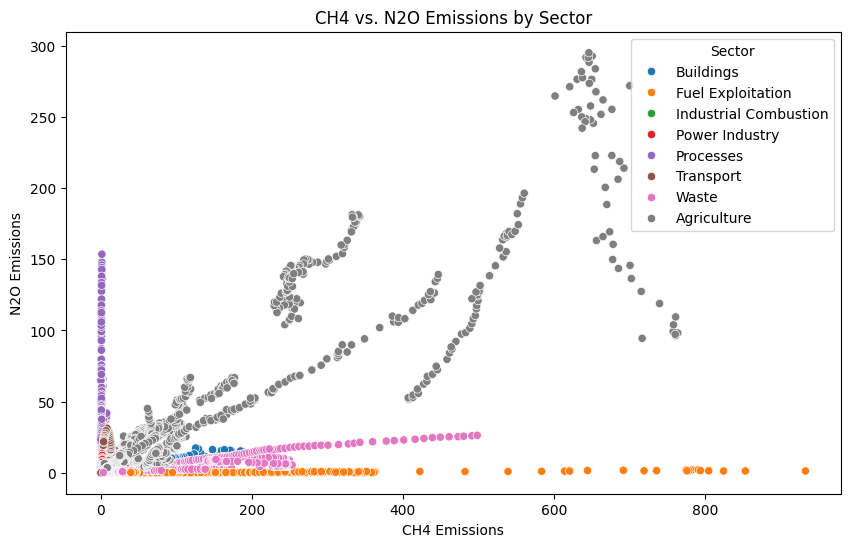

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg_pivot, x='GWP_100_AR5_CH4', y='GWP_100_AR5_N2O', hue='Sector')
plt.title('CH4 vs. N2O Emissions by Sector')
plt.xlabel('CH4 Emissions')
plt.ylabel('N2O Emissions')
plt.show()

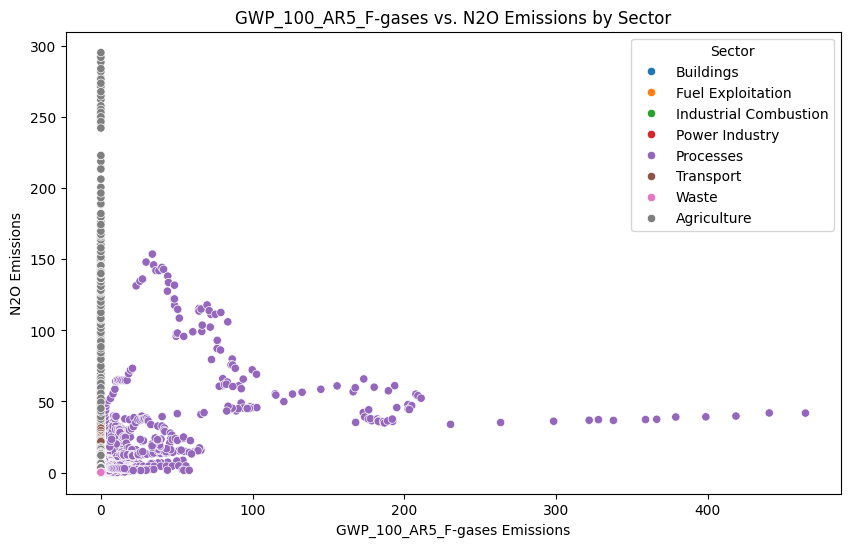

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ghg_pivot, x='GWP_100_AR5_F-gases', y='GWP_100_AR5_N2O', hue='Sector')
plt.title('GWP_100_AR5_F-gases vs. N2O Emissions by Sector')
plt.xlabel('GWP_100_AR5_F-gases Emissions')
plt.ylabel('N2O Emissions')
plt.show()

#### **Regression Test Between GHG gases**

In [46]:
# Regression Analysis between CO2 and other Gases

import statsmodels.api as sm
X = ghg_pivot[['GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']]
y = ghg_pivot['CO2']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     781.3
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:01:05   Log-Likelihood:            -5.4350e+05
No. Observations:               87874   AIC:                         1.087e+06
Df Residuals:                   87870   BIC:                         1.087e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  15.4701    

In [47]:
# Regression Analysis between CH4 and other Gases

import statsmodels.api as sm
X = ghg_pivot[['CO2', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']]
y = ghg_pivot['GWP_100_AR5_CH4']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        GWP_100_AR5_CH4   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 2.555e+04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:01:05   Log-Likelihood:            -4.0494e+05
No. Observations:               87874   AIC:                         8.099e+05
Df Residuals:                   87870   BIC:                         8.099e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6600    

In [48]:
# Regression Analysis between F-Gases and other Gases

import statsmodels.api as sm
X = ghg_pivot[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_N2O']]
y = ghg_pivot['GWP_100_AR5_F-gases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     GWP_100_AR5_F-gases   R-squared:                       0.087
Model:                             OLS   Adj. R-squared:                  0.087
Method:                  Least Squares   F-statistic:                     2775.
Date:                 Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                         08:01:05   Log-Likelihood:            -2.8421e+05
No. Observations:                87874   AIC:                         5.684e+05
Df Residuals:                    87870   BIC:                         5.685e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2174      

In [49]:
# Regression Analysis between N2O and other Gases
import statsmodels.api as sm
X = ghg_pivot[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases']]
y = ghg_pivot['GWP_100_AR5_N2O']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        GWP_100_AR5_N2O   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                 2.780e+04
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:01:05   Log-Likelihood:            -2.9272e+05
No. Observations:               87874   AIC:                         5.854e+05
Df Residuals:                   87870   BIC:                         5.855e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1232    

### **Analysis of GHG with Temperature Data**

In [50]:
GHG_df = ghg_pivot.groupby("Year")[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']].sum().reset_index()

In [51]:
temp_df = temp_data[['year','annual_anomaly']]

In [52]:
temp_df.rename(columns={'year': 'Year'}, inplace=True)

# Merge the two DataFrames on the 'Year' column
temp_GHG_df = pd.merge(temp_df, GHG_df, on='Year', how='inner')
temp_GHG_df.head()


,Year,annual_anomaly,CO2,GWP_100_AR5_CH4,GWP_100_AR5_F-gases,GWP_100_AR5_N2O
0,1970,0.071,19314.006133,7862.519447,176.595007,1755.749598
1,1970,0.062,19314.006133,7862.519447,176.595007,1755.749598
2,1970,0.066,19314.006133,7862.519447,176.595007,1755.749598
3,1970,0.060,19314.006133,7862.519447,176.595007,1755.749598
4,1970,0.048,19314.006133,7862.519447,176.595007,1755.749598


In [53]:
temp_GHG_df = temp_GHG_df.groupby('Year').mean().reset_index()

In [54]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


# Split data into train and test sets
train_data = temp_GHG_df[:-10]
test_data = temp_GHG_df[-10:]

In [55]:
# train_data

In [56]:
# test_data

### **MODELS IMPLEMENTATION**
#### **1) ARIMA Model Implementation**

In [57]:
# Fit ARIMA model
model_arima = ARIMA(train_data['annual_anomaly'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()

In [58]:
# Make predictions
predictions_arima = model_arima_fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [59]:
# Evaluate ARIMA model
rmse_arima = mean_squared_error(test_data['annual_anomaly'], predictions_arima, squared=False)
print('ARIMA RMSE:', rmse_arima)


ARIMA RMSE: 0.23887747769483542


#### **2) SARIMA Model Implementation**

In [60]:
# Fit SARIMA model
# Example: SARIMA(5, 1, 0)(1, 1, 1, 12) - you might need to tune parameters
model_sarima = SARIMAX(train_data['annual_anomaly'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

In [61]:
# Make predictions
predictions_sarima = model_sarima_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# Evaluate SARIMA model
rmse_sarima = mean_squared_error(test_data['annual_anomaly'], predictions_sarima, squared=False)
print('SARIMA RMSE:', rmse_sarima)

SARIMA RMSE: 0.1088147548990911


#### **Comparison of Model Prediction**

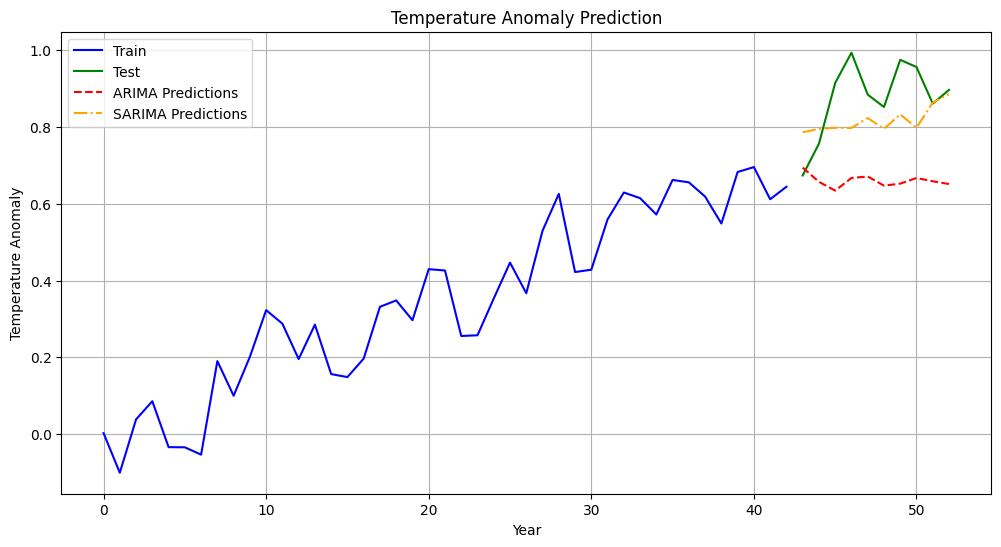

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['annual_anomaly'], label='Train', color='blue')
plt.plot(test_data.index, test_data['annual_anomaly'], label='Test', color='green')
plt.plot(test_data.index, predictions_arima, label='ARIMA Predictions', color='red', linestyle='--')
plt.plot(test_data.index, predictions_sarima, label='SARIMA Predictions', color='orange', linestyle='-.')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly Prediction')
plt.legend()
plt.grid(True)
plt.show()


### **DL Model Implementation**

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data for LSTM
# Scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(temp_GHG_df[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O', 'annual_anomaly']])

In [64]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :-1])
        y.append(data[i + seq_length, -1])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

In [65]:
# Split data into train and test sets
train_size = -10
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [66]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 4)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)  # Adjust epochs and batch_size as needed

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2139
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1062
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0342
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0065
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0247
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0304
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0156
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0080
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0069
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0088
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0105
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0106
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0096
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0084
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0072
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

In [67]:
# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse scaling to get actual predictions
y_pred = scaler.inverse_transform(np.concatenate((X_test[:, -1, :], y_pred_scaled), axis=1))[:, -1]

# Evaluate the model
rmse_lstm = mean_squared_error(y_test, y_pred, squared=False)
print('LSTM RMSE:', rmse_lstm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
LSTM RMSE: 0.07219679481101855


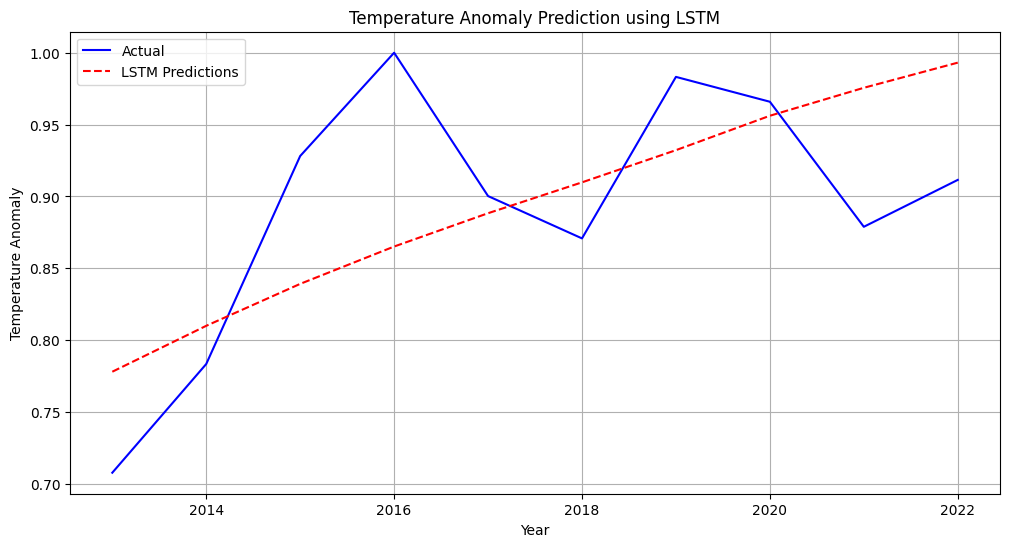

In [68]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(temp_GHG_df['Year'][-len(y_test):], y_test, label='Actual', color='blue')
plt.plot(temp_GHG_df['Year'][-len(y_test):], y_pred, label='LSTM Predictions', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly Prediction using LSTM')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
y_pred_series = pd.Series(y_pred, index=test_data.index, name='predicted_mean')

#### **Comparsion of All Models in terms of Prediction**

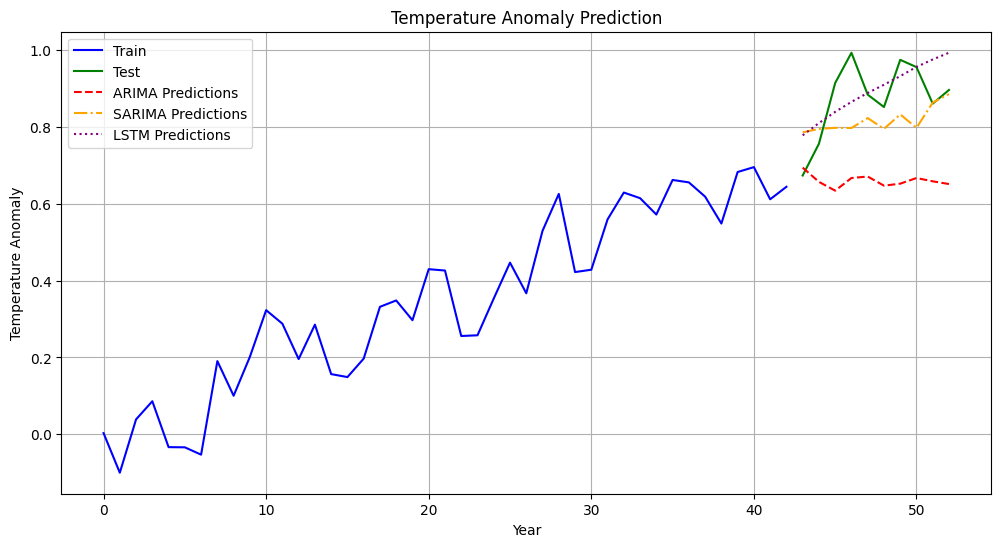

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['annual_anomaly'], label='Train', color='blue')
plt.plot(test_data.index, test_data['annual_anomaly'], label='Test', color='green')
plt.plot(test_data.index, predictions_arima, label='ARIMA Predictions', color='red', linestyle='--')
plt.plot(test_data.index, predictions_sarima, label='SARIMA Predictions', color='orange', linestyle='-.')
plt.plot(test_data.index, y_pred_series, label='LSTM Predictions', color='purple', linestyle=':')


plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Temperature Anomaly Prediction')
plt.legend()
plt.grid(True)
plt.show()


## Forcasting Future GHG Data


In [71]:
scaler_ghg = MinMaxScaler()
ghg_data_scaled = scaler_ghg.fit_transform(GHG_df[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']])

In [72]:
# Create sequences for LSTM
# Ensure that the create_sequences function is correctly implemented and returns sequences with 4 features
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
# Create sequences for LSTM
X_ghg, y_ghg = create_sequences(ghg_data_scaled, seq_length)

In [73]:
# Build LSTM model for GHG forecasting
model_ghg = Sequential()
model_ghg.add(LSTM(50, activation='relu', input_shape=(seq_length, 4)))
model_ghg.add(Dense(4))  # Predict all 4 GHGs

model_ghg.compile(optimizer='adam', loss='mse')

# Train the model
model_ghg.fit(X_ghg,y_ghg, epochs=50, batch_size=32)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3627
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3459 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3067
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3030
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2824
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2447 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2185
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2166 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1865
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1722
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1449 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1354
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1116
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0933
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0694
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━

In [74]:
# Forecast future GHG emissions
future_years = 10
last_sequence = ghg_data_scaled[-seq_length:]
future_predictions = []

for _ in range(future_years):
    prediction = model_ghg.predict(last_sequence.reshape(1, seq_length, 4))
    future_predictions.append(prediction[0])
    last_sequence = np.concatenate((last_sequence[1:], prediction), axis=0)

# Inverse scaling to get actual GHG predictions
future_predictions = scaler_ghg.inverse_transform(np.array(future_predictions))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [75]:
# Create a DataFrame for future predictions
future_years_range = range(GHG_df['Year'].max() + 1, GHG_df['Year'].max() + future_years + 1)
future_ghg_df = pd.DataFrame(future_predictions, index=future_years_range,
                           columns=['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O'])


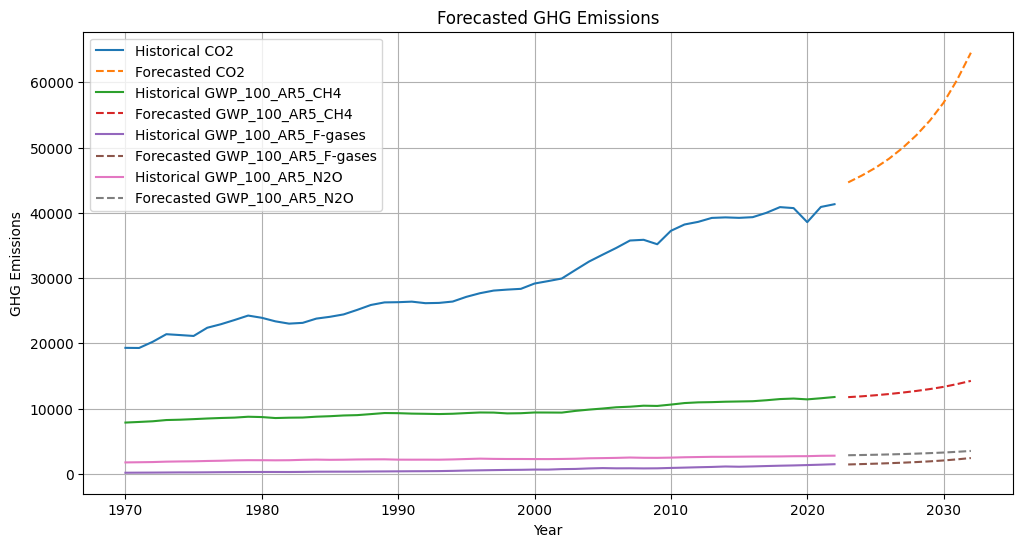

In [76]:
# Plot forecasted GHG emissions
plt.figure(figsize=(12, 6))
for gas in ['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']:
    plt.plot(GHG_df['Year'], GHG_df[gas], label='Historical '+gas)
    plt.plot(future_ghg_df.index, future_ghg_df[gas], label='Forecasted '+gas, linestyle='--')

plt.xlabel('Year')
plt.ylabel('GHG Emissions')
plt.title('Forecasted GHG Emissions')
plt.legend()
plt.grid(True)
plt.show()


#### **Future Temperature Forecasting Using Predicted GHG Data**

In [77]:
future_ghg_df.reset_index(inplace=True)
future_ghg_df.rename(columns={'index': 'Year'}, inplace=True)
all_ghg_df = pd.concat([GHG_df, future_ghg_df])
all_ghg_df.head(2)

,Year,CO2,GWP_100_AR5_CH4,GWP_100_AR5_F-gases,GWP_100_AR5_N2O
0,1970,19314.006133,7862.519447,176.595007,1755.749598
1,1971,19293.331852,7957.337326,188.182879,1781.919955


In [78]:
future_ghg_scaled = scaler_ghg.transform(all_ghg_df[['CO2', 'GWP_100_AR5_CH4', 'GWP_100_AR5_F-gases', 'GWP_100_AR5_N2O']])

In [79]:
future_ghg_scaled.shape

(63, 4)

In [80]:
# Create sequences for future prediction
future_sequences = []
for i in range(len(future_ghg_scaled) - seq_length + 1):
  future_sequences.append(future_ghg_scaled[i: i + seq_length])
future_sequences = np.array(future_sequences)

In [81]:
future_sequences = future_sequences[-10:]

In [82]:
prediction = model.predict(future_sequences)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [83]:
# Inverse scaling to get actual predictions:
future_predictions = scaler.inverse_transform(np.concatenate((future_sequences[:, -1, :], prediction), axis=1))[:, -1]


In [84]:
# Create a DataFrame for future temperature predictions
future_temp_df = pd.DataFrame(future_predictions, index=future_years_range,
                               columns=['Predicted Temperature Anomaly'])

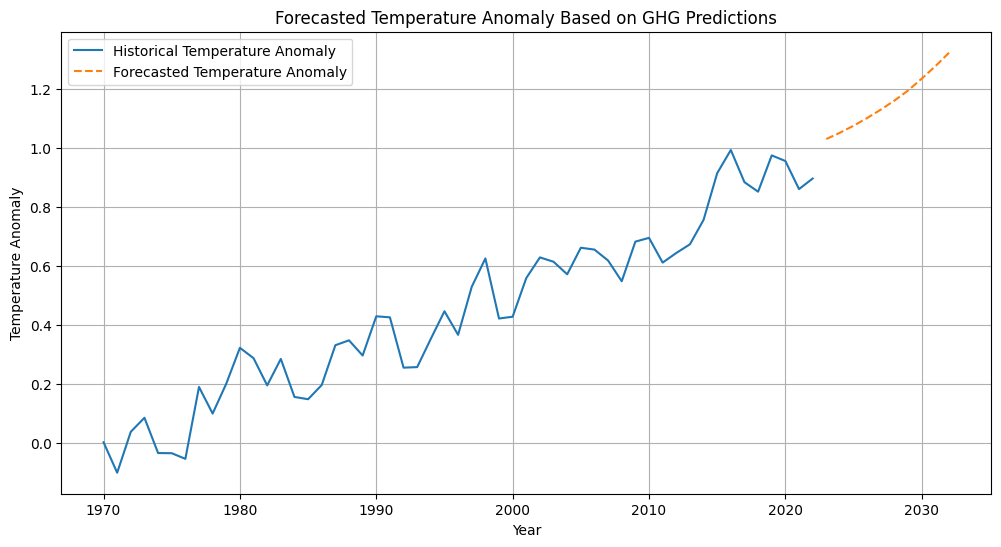

In [85]:

plt.figure(figsize=(12, 6))
plt.plot(temp_GHG_df['Year'], temp_GHG_df['annual_anomaly'], label='Historical Temperature Anomaly')
plt.plot(future_temp_df.index, future_temp_df['Predicted Temperature Anomaly'], label='Forecasted Temperature Anomaly', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.title('Forecasted Temperature Anomaly Based on GHG Predictions')
plt.legend()
plt.grid(True)
plt.show()
